## mehmetfatihdata

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')


In [2]:
titanic=pd.read_csv('dataset/titanic.csv')
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [3]:
titanic["sex"]=titanic.Sex.replace({'female':1,'male':0})
titanic=titanic.drop(columns='Sex',axis=0)
titanic['Age_inter'] = titanic.groupby("sex")['Age'].transform(lambda x: x.interpolate())
titanic['Age_inter'].isnull().sum()/len(titanic)

0.0

In [15]:
titanic['Age']=titanic['Age_inter']
X = titanic [['PassengerId', 'Pclass', 'SibSp','Age', 'sex',
       'Parch', 'Fare']]
y = titanic['Survived']

In [23]:
print(len(X), len(y))
print("Veri kümesinde {} satır  veri bulunmakta...".format(len(X)))

891 891
Veri kümesinde 891 satır  veri bulunmakta...


In [17]:
from sklearn.model_selection import train_test_split
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)

In [25]:
plt.style.use('fivethirtyeight')

X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.2)
print("Eğitim veri kümesindeki satır sayısı :  {} ".format(len(X_egitim)))
print("Eğitim veri kümesindeki hedef sayısı :  {} ".format(len(y_egitim)))
print("Test veri kümesindeki satır sayısı :  {} ".format(len(X_test)))
print("Test veri kümesindeki hedef sayısı :  {} ".format(len(y_test)))

Eğitim veri kümesindeki satır sayısı :  712 
Eğitim veri kümesindeki hedef sayısı :  712 
Test veri kümesindeki satır sayısı :  179 
Test veri kümesindeki hedef sayısı :  179 


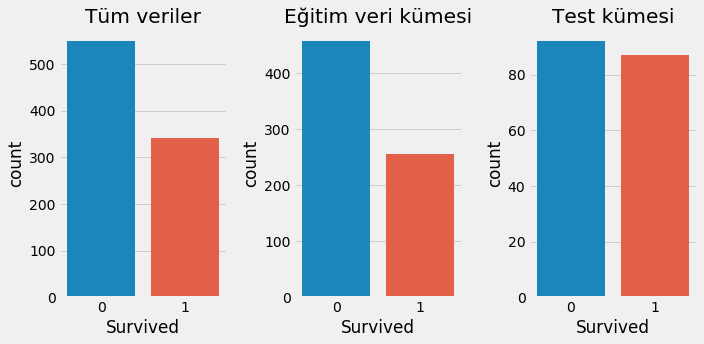

Tüm veri kümesi '0' yüzdesi : %62 
Test verisi '0' yüzdesi     : %51 
Eğitim verisi '0' yüzdesi   : %64 


In [29]:
plt.figure(figsize=(10,5))
plt.subplot(131)
sns.countplot(y)
plt.title("Tüm veriler")
plt.subplot(132)
sns.countplot(y_egitim)
plt.title("Eğitim veri kümesi")
plt.subplot(133)
sns.countplot(y_test)
plt.title("Test kümesi")
plt.tight_layout()
plt.show()
print("Tüm veri kümesi '0' yüzdesi : %{:.0f} ".format(len(y[y==0])/len(y)*100))
print("Test verisi '0' yüzdesi     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))
print("Eğitim verisi '0' yüzdesi   : %{:.0f} ".format(len(y_egitim[y_egitim==0])/len(y_egitim)*100))

## stratify=y 

In [30]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print("Tüm veri kümesi '0' yüzdesi : %{:.0f} ".format(len(y[y==0])/len(y)*100))
print("Test verisi '0' yüzdesi     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))
print("Eğitim verisi '0' yüzdesi   : %{:.0f} ".format(len(y_egitim[y_egitim==0])/len(y_egitim)*100))

Tüm veri kümesi '0' yüzdesi : %62 
Test verisi '0' yüzdesi     : %61 
Eğitim verisi '0' yüzdesi   : %62 


In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_egitim, y_egitim)
tahmin_eğitim = model.predict(X_egitim)
tahmin_test = model.predict(X_test)
model.score(X_test, y_test)

0.8100558659217877

In [39]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1111)

In [38]:
parcalar = kf.split(X)
for num, (eğitim_index, test_index) in enumerate(parcalar):
    print("{}.Eğitim Kümesi Boyutu : {}".format(num+1,len(eğitim_index)))
    print("{}.Test Kümesi Boyutu   : {}".format(num+1,len(test_index)))
    print('-'*27)
    

1.Eğitim Kümesi Boyutu : 712
1.Test Kümesi Boyutu   : 179
---------------------------
2.Eğitim Kümesi Boyutu : 713
2.Test Kümesi Boyutu   : 178
---------------------------
3.Eğitim Kümesi Boyutu : 713
3.Test Kümesi Boyutu   : 178
---------------------------
4.Eğitim Kümesi Boyutu : 713
4.Test Kümesi Boyutu   : 178
---------------------------
5.Eğitim Kümesi Boyutu : 713
5.Test Kümesi Boyutu   : 178
---------------------------


In [41]:
from sklearn.metrics import mean_squared_error
model2 = LogisticRegression()
parcalar = kf.split(X)
dogruluk_liste = []

In [ ]:
for i, (eğitim_indeks, test_indeks) in enumerate(parcalar):
    X_egitim, y_egitim = X[eğitim_indeks], y[eğitim_indeks]
    X_test, y_test = X[test_indeks], y[test_indeks]
    model2.fit(X_egitim, y_egitim)
    tahmin = model2.predict(X_test)
    dogruluk_degeri = model.score(X_test, y_test)  
    dogruluk_liste.append(dogruluk_degeri)
    print("{}.Parça Doğruluk Değeri: {:.3f}".format(i+1, dogruluk_degeri))
    print("-"*30)

In [36]:
print("Ortalama doğruluk değeri : {:.2f}".format(np.mean(dogruluk_liste)))

Ortalama doğruluk değeri : nan


In [49]:
from sklearn.model_selection import cross_validate, cross_val_score

In [52]:
lrm = LogisticRegression()
cv = cross_validate(estimator=lrm,
                     X=X,
                     y=y,
                     cv=10,
                    )
print('Test Skorları            : ', cv['test_score'], sep = '\n')
print("-"*50)
print('Eğitim Skorları          : ', cv['train_score'], sep = '\n')

Test Skorları            : 
[0.78888889 0.77777778 0.74157303 0.82022472 0.78651685 0.76404494
 0.80898876 0.7752809  0.80898876 0.81818182]
--------------------------------------------------


KeyError: 'train_score'

END.